## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = combined_data_df["Mouse ID"].unique()
print(len(number_of_mice))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data_df = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_data_df[combined_data_df.duplicated(['Mouse ID'])]
duplicate_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data_df [combined_data_df["Mouse ID"].isin(["g989"]) == False].reset_index()

In [21]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned_df = cleaned_data_df["Mouse ID"].unique()
print(len(number_of_mice_cleaned_df))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_tumor_volume = cleaned_data_df.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]

avg_tumor_volume = regimen_tumor_volume.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
# print(avg_tumor_volume)

median_tumor_volume = regimen_tumor_volume.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
# print(median_tumor_volume)

var_tumor_volume = regimen_tumor_volume.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
# print(var_tumor_volume)

std_tumor_volume = regimen_tumor_volume.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
# print(std_tumor_volume)

sem_tumor_volume = regimen_tumor_volume.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# print(sem_tumor_volume)

# Assemble the resulting series into a single summary dataframe.
tumor_stats_table = pd.DataFrame({"Tumor Volume Mean": avg_tumor_volume,
                                 "Tumor Volume Median": median_tumor_volume,
                                 "Tumor Volume Standard Deviation": std_tumor_volume,
                                 "Tumor Volume SEM": sem_tumor_volume})

tumor_stats_table ["Tumor Volume Mean"] = tumor_stats_table["Tumor Volume Mean"].map("{:,.2f}".format)
tumor_stats_table ["Tumor Volume Median"] = tumor_stats_table["Tumor Volume Median"].map("{:,.2f}".format)
tumor_stats_table ["Tumor Volume Standard Deviation"] = tumor_stats_table["Tumor Volume Standard Deviation"].map("{:,.2f}".format)
tumor_stats_table ["Tumor Volume SEM"] = tumor_stats_table["Tumor Volume SEM"].map("{:,.2f}".format)

tumor_stats_table


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.32,50.45,6.62,0.54
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_data_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': ['mean','median','std','sem']})

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

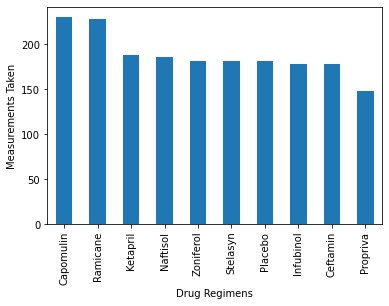

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# total_measurements = cleaned_data_df.groupby(["Drug Regimen"]).value_counts()
total_measurements = cleaned_data_df['Drug Regimen'].value_counts()

# total_measurements.plot.bar(cleaned_data_df['Drug Regimen'],total_measurements)
total_measurements.plot.bar()
plt.xlabel("Drug Regimens")
plt.ylabel("Measurements Taken")
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

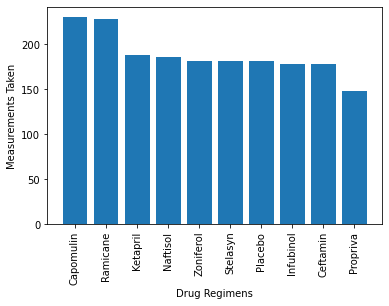

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(total_measurements.index.values, total_measurements.values)
plt.xlabel("Drug Regimens")
plt.ylabel("Measurements Taken")
plt.xticks(rotation=90)


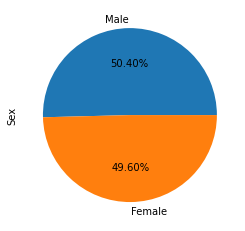

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# mice_distribution = cleaned_data_df['Sex'].value_counts()
# mice_distribution = cleaned_data_df['Sex'].unique()
cleaned_data_df.drop_duplicates(subset = "Mouse ID")
mice_distribution = cleaned_data_df.drop_duplicates(subset = "Mouse ID")["Sex"].value_counts()

mice_distribution.plot.pie(autopct="%.2f%%")

([<matplotlib.patches.Wedge at 0x1ce601989a0>,
 [Text(-0.013934097579311132, 1.0999117423341975, ''),
  Text(0.013934097579310996, -1.0999117423341975, '')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.40%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.60%')])

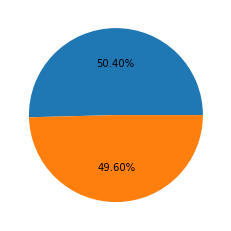

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_distribution, autopct="%.2f%%")
# plt.show(autopct="%.2f%%")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
